In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [132]:
def Dataprocess(location):
    df = pd.read_csv(location)
    
    df.drop_duplicates(inplace=True)    # inplace is for overwriting
    
    df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    
    df.Sex[df.Sex == 'male'] = 1
    df.Sex[df.Sex == 'female'] = 0

    df.Embarked[df.Embarked == 'S'] = 1
    df.Embarked[df.Embarked == 'C'] = 0
    df.Embarked[df.Embarked == 'Q'] = 2
    
    age = df['Age']
    df['Age'] = (age - age.mean())/age.std()
    df['Age'].fillna(df['Age'].mean())

    fare = df['Fare']
    df['Fare'] = (fare - fare.mean())/fare.std()
    df['Fare'].fillna(df['Fare'].mean())

    df.ffill(inplace = True) 
    return df

In [133]:
# split into train test sets
train_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\train.csv"
df_train = Dataprocess(train_loc)
X_train = np.array(df_train.drop(['Survived'],axis = 1))
y_train = np.array(df_train['Survived'])

test_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\test.csv"
df_test = Dataprocess(test_loc)
X_test = np.array(df_test)

C:\Users\varun\AppData\Local\Temp/ipykernel_16880/2589322004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'male'] = 1
C:\Users\varun\AppData\Local\Temp/ipykernel_16880/2589322004.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'female'] = 0
C:\Users\varun\AppData\Local\Temp/ipykernel_16880/2589322004.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked == 'S'] = 1
C:\

In [134]:
y_train = y_train.reshape(y_train.shape[0],1)
print('X_train: ' ,(X_train.shape))
print('Y_train: ' ,(y_train.shape))
print('X_test:  ' ,(X_test.shape))
iterations = []
cost = []

X_train:  (891, 7)
Y_train:  (891, 1)
X_test:   (418, 7)


In [135]:
def sigmoid(z) :
    a = 1/(1+np.exp(-z))
    return a

In [136]:
def cost_function(hypothesis):
    cost = -np.mean(y_train*np.log(hypothesis) + (1-y_train)*np.log(1-hypothesis))
    return cost

In [137]:
def gradient_descent(bias,weights,m,learning_rate,iter) :
    for i in range(iter) :
        hypothesis = sigmoid(np.dot(X_train,weights) + bias).reshape(X_train.shape[0],1)      # 100*3  3*1 ---> 100*1
        weights = weights - learning_rate*(np.mean(X_train*(hypothesis-y_train),axis=0).reshape(m,1))
        bias = bias - learning_rate*(np.mean(hypothesis-y_train))
        if i%1000 == 0:
            cost.append(cost_function(hypothesis))
            iterations.append(i)
            print("cost",cost_function(hypothesis))
    print("Final cost",cost_function(hypothesis))
    return weights,bias

In [138]:
m = X_train.shape[1]
weights = (np.random.randn(m) * 0.1).reshape(m,1)
bias = np.array([-1])

weights, bias= gradient_descent(bias,weights,m,learning_rate=0.5,iter=10000)

cost 0.709300892463664
cost 0.44333099367218104
cost 0.4432356986870741
cost 0.44323550046485044
cost 0.44323550003731266
cost 0.443235500036389
cost 0.44323550003638695
cost 0.44323550003638695
cost 0.44323550003638695
cost 0.44323550003638695
Final cost 0.44323550003638695


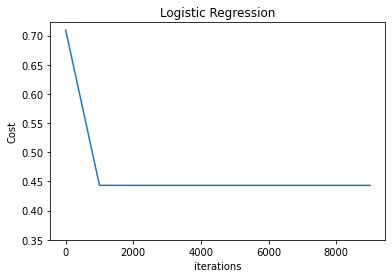

In [139]:
import matplotlib.pyplot as plt

x=iterations
y=cost

plt.plot(x,y)

y_ticks = [0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35]
plt.yticks(y_ticks)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title("Logistic Regression")
plt.show()

In [140]:
p = sigmoid(np.dot(X_train,weights) + bias) >= 0.5
accuracy = p == y_train
print(np.mean(accuracy))

0.7890011223344556
